In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
titanic_data = pd.read_csv("titanic dataset")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [33]:
print("# of passengers in original data:" +str(len(titanic_data.index)))

# of passengers in original data:418


## analysing data


<AxesSubplot:xlabel='Survived', ylabel='count'>

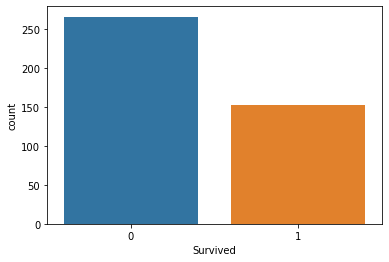

In [34]:
sns.countplot(x="Survived", data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

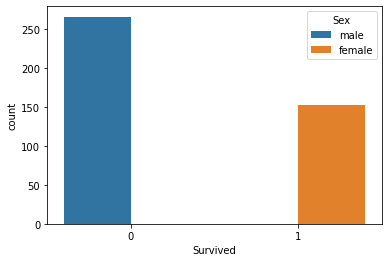

In [35]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

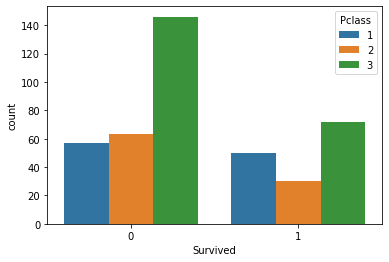

In [36]:
sns.countplot(x="Survived",hue="Pclass", data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

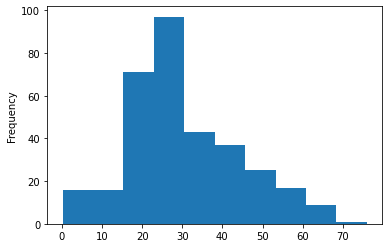

In [37]:
titanic_data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

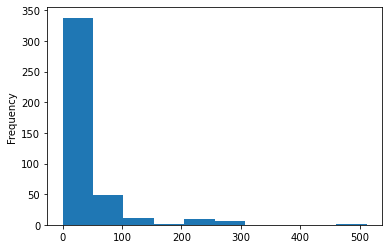

In [38]:
titanic_data["Fare"].plot.hist()

In [39]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

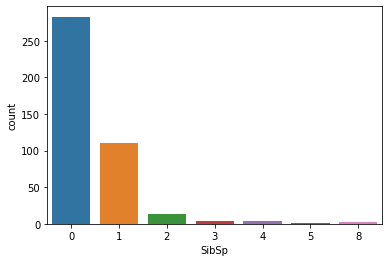

In [40]:
sns.countplot(x="SibSp",data=titanic_data)

# data wrangling: about cleaning data detecting missing values

In [41]:
# to detect if there is any column with no data isnull means no data
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [42]:
# to get all missing data the column they are and the total
titanic_data.isnull().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

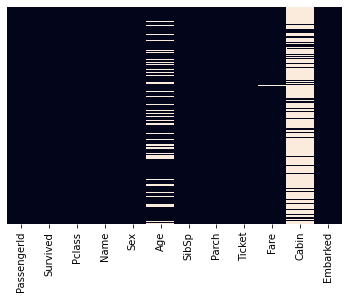

In [43]:
# the heat map shows the data with color and you can detect any data to clean up if no data to clean all will be the same color it is used to visualise data
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

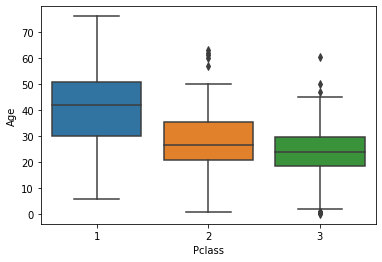

In [44]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [45]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
titanic_data.drop("Cabin", axis=1, inplace=True)

In [47]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [48]:
# to remove all na info
titanic_data.dropna(inplace=True)

In [49]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<AxesSubplot:>

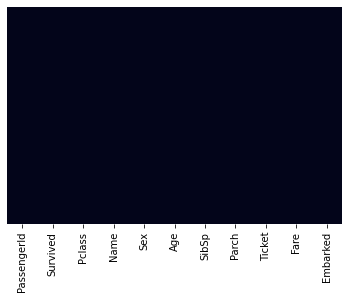

In [50]:
# to check if there is any data to clean up again
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [51]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [52]:
# to info about sex alone
pd.get_dummies(titanic_data["Sex"])

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
409,1,0
411,1,0
412,1,0
414,1,0


In [53]:
sex=pd.get_dummies(titanic_data["Sex"],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,1
3,1
4,0


In [54]:
embark=pd.get_dummies(titanic_data["Embarked"])
embark.head(5)

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [55]:
embark=pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark.head(5)

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [56]:
Pcl=pd.get_dummies(titanic_data["Pclass"],drop_first=True)
Pcl.head(5)

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [57]:
titanic_data=pd.concat([titanic_data,sex,embark,Pcl],axis=1)


In [58]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [59]:
titanic_data.drop(["Sex", "Embarked", "PassengerId", "Name","Ticket", "Pclass"],axis=1)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,34.5,0,0,7.8292,1,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,1
2,0,62.0,0,0,9.6875,1,1,0,1,0
3,0,27.0,0,0,8.6625,1,0,1,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
409,1,3.0,1,1,13.7750,0,0,1,0,1
411,1,37.0,1,0,90.0000,0,1,0,0,0
412,1,28.0,0,0,7.7750,0,0,1,0,1
414,1,39.0,0,0,108.9000,0,0,0,0,0


# Training and testing data

# Training


In [91]:
x= titanic_data.drop("Age",axis=1)
y= titanic_data["Age"]

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test, y_train,y_test= train_test_split(x, y, test_size=0.3, random_state=1)

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
logmodel=LogisticRegression()

In [96]:
logmodel.fit(x_train, y_train)

ValueError: could not convert string to float: 'Smith, Mrs. Lucien Philip (Mary Eloise Hughes)'

In [97]:
predictions = logmodel.predict(x_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [88]:
from sklearn.metrics import classification_report

In [89]:
classification_report(y_test, prediction)

NameError: name 'prediction' is not defined

In [100]:
from sklearn.metrics import confusion_matrix